In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# note that number values are called numerical column and stings are cathegorical column

In [2]:
# for practise, there are some data in plotly to work with. eg: tips, gapminder (called sample data)
df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


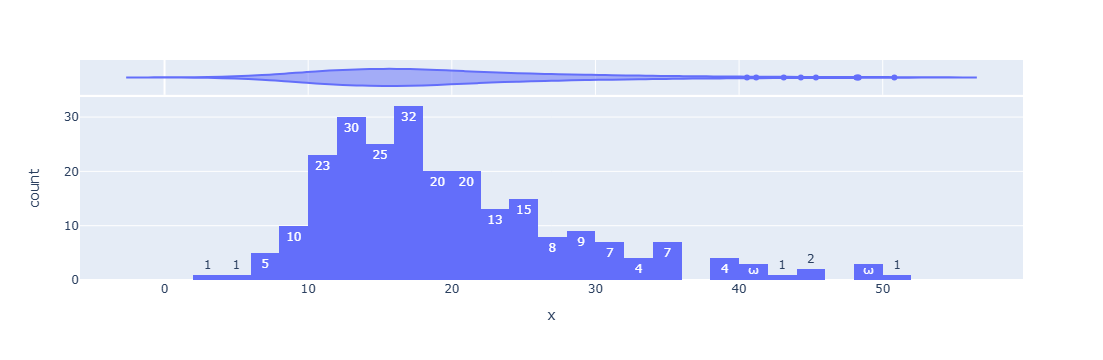

In [3]:
# distribute the value of total bil
fig = px.histogram(x = df['total_bill'], text_auto = True, marginal = 'violin')
fig.show()

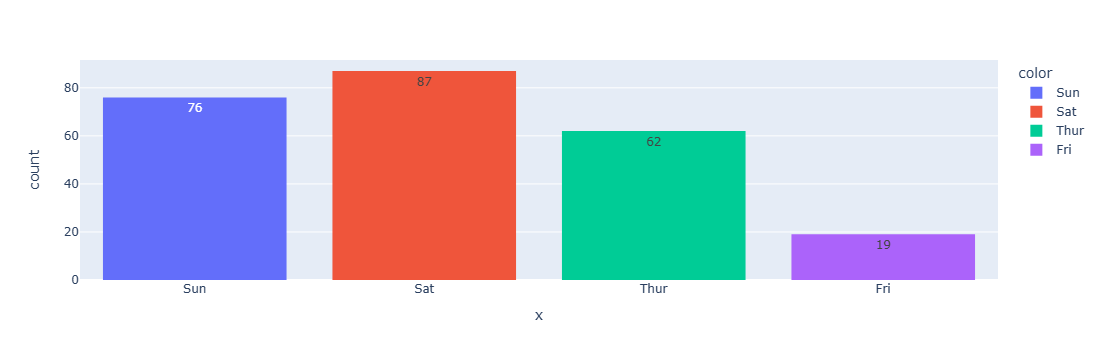

In [4]:
# distrution the value of day
fig = px.histogram(x = df['day'], text_auto = True, color = df ['day'])
fig.show()

In [5]:
# barplot
# barplot is a comparism plot, comparing the value of numerical column with cathegorical column 
# # but you must first aggregate the data
# get the average of total bill per day
df2 = df.groupby('day').apply('mean', numeric_only = True)
df2.reset_index(inplace = True)
df2

,day,total_bill,tip,size
0,Fri,17.151579,2.734737,2.105263
1,Sat,20.441379,2.993103,2.517241
2,Sun,21.410000,3.255132,2.842105
3,Thur,17.682742,2.771452,2.451613


In [6]:
# now plot it
fig = px.bar(x = df2['day'], y = df2['total_bill'], text_auto = True, color = df2['day'])
fig.show()

In [7]:
# making it in violin
fig = px.violin(x = df['day'], y = df['total_bill'], color = df['day'])
fig.show()

In [8]:
# making it to box
fig = px.box(x = df['day'], y = df['total_bill'], color = df['day'])
fig.show()

In [9]:
# making in funnel
fig = px.funnel(x = df2['day'], y = df2['total_bill'],)
fig.show()


In [10]:
# making it in funnel but adding color
fig = px.funnel(x = df2['day'], y = df2['total_bill'], color = df2['day'])
fig.show()


In [11]:
# pie chart
# pie chart is a compositional chart
fig = px.pie(names = df['sex'], values = df['total_bill'])
fig.show()
# this means that 67% of male payed bill


In [12]:
#doughnut chart
# doughnut chart is a pie chart with a hole
fig = px.pie(names = df['sex'], values = df['total_bill'], hole = 0.5)
fig.show()
# this means that 67% of male payed bill

In [13]:
# sun burst is also a compositional chart but in diff dimention. helps to make your analysis be in stages
# to make the analysis start from day to time to sex to smoker or
# to know the total tip for day, time, sex and smoker 
fig = px.sunburst(df, path = ['day', 'time', 'sex', 'smoker'], values = 'tip',)
fig.show()
# click on it to analyse

In [14]:
# to make it in tree map
fig = px.treemap(df, path = ['day', 'time', 'sex', 'smoker'], values = 'tip',)
fig.show()

In [15]:
# to get another data from plotly
df3 = px.data.gapminder()
df3.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [16]:
# time series data plotting deals with trend 
# to check the population trend of nigeria
# to work on the country nigeria only
# first is to bring nigeria out
df_nigeria = df3[df3['country']== 'Nigeria']
df_nigeria.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1128,Nigeria,Africa,1952,36.324,33119096,1077.281856,NGA,566
1129,Nigeria,Africa,1957,37.802,37173340,1100.592563,NGA,566
1130,Nigeria,Africa,1962,39.360,41871351,1150.927478,NGA,566
1131,Nigeria,Africa,1967,41.040,47287752,1014.514104,NGA,566
1132,Nigeria,Africa,1972,42.821,53740085,1698.388838,NGA,566


In [17]:
# then plot it
fig = px.line(x = df_nigeria['year'], y = df_nigeria['pop'])
fig.show()
# this means that nigeria population have been growing steadily

In [18]:
# scatter plot is used to check the relationship between 2 numerical column
# starter works on larger date set like pie chart too
# note that it can either be negative, positive or no relationship at all
# postive moves in one direction upward
# negative means one move up but one of the value is moving down 
# no relation is when you cannot finetune the movement
fig = px.scatter(x = df3['pop'], y = df3['lifeExp'])
fig.show()
# this means that the more the population increase the more the life expectancy increases

In [19]:
# bobble plot
fig = px.scatter(x = df3['gdpPercap'], y = df3['lifeExp'], size_max = 100, size = df3['pop'])
fig.show()
# this means that increase in gdpper cap has a positive rel with life expectancy cause incres in gdpper cap leads to increase in life expectancy


In [20]:
# animation plot
fig = px.scatter(df3, x = 'gdpPercap', y = 'lifeExp', color = 'continent', hover_data= 'country', animation_frame = 'year', animation_group = 'country', size = 'pop', size_max = 55, log_x = True, range_x = [100,1000000], range_y = [10,99])
fig.show()

In [21]:
# hitmap plotting
# hitmap is a correlation plot
# helps to show how cathegory a and cathegory b correlates using a numerical value as the yastic
# it is also a relationship tpye of chart but it is unique because it uses color to represent outcome (result)
# note that you can add title to all the plot
# first is to aggregate the data
df4 = df.groupby(['day', 'time']).apply('mean', numeric_only = True)
df4.reset_index(inplace = True)
df4

,day,time,total_bill,tip,size
0,Fri,Dinner,19.663333,2.940000,2.166667
1,Fri,Lunch,12.845714,2.382857,2.000000
2,Sat,Dinner,20.441379,2.993103,2.517241
3,Sun,Dinner,21.410000,3.255132,2.842105
4,Thur,Dinner,18.780000,3.000000,2.000000
5,Thur,Lunch,17.664754,2.767705,2.459016


In [22]:
# then you plot
pivot_table = df4.pivot(index ='time', columns = 'day', values = 'total_bill')
fig = px.imshow(pivot_table, labels = dict(x = 'day', y = 'time', color = 'total_bill'), title = 'HEAT MAP')
fig.show()